# CHICAGO CRIME ANALYSIS (2021)

## Contents

* [Introduction](#Introduction)

* [Importing Libraries](#Importing-Libraries)

* [Data Wrangling](#Data-Wrangling)

* [Exploratory Data Analysis](#Exploratory-Data-Analysis) 

* [Conclusions](#Conclusions)

##  Introduction
This project focused on analysing crime data of the City of Chicago for the year 2021. Datasets used in this project include Chicago crime data (each row is a reported crime), Chicago community population data, Chicago community boundaries, and socio-economic indicators. In this project, the following questions will be answered:
* How did crime change over time?
* What are the top 5 crime by primary type?
* How many arrests were made?
* What is the crime rate in each community?
* What is the relationship between crime rate and unemployment?

## Importing Libraries

In [34]:
import pandas as pd # for data analysis and manipulation
import geopandas as gpd # for spatial analysis
import matplotlib.pyplot as plt # for visualisation
import numpy as np  

In [3]:
# reading datasets into dataframe/geodataframe
crime = pd.read_csv('Crimes_-_2021.csv') # crime dataset
community = gpd.read_file('Community_Area.geojson') # community boundaries dataset, a spatial (polygon) dataset
population = pd.read_csv('Population.csv') # 2020 population dataset
indicator = pd.read_csv('indicators.csv') # socio economic indicators, including unemployment percentage

# Data Wrangling

In [4]:
# inspecting crime dataset
crime.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12260346,JE102126,01/03/2021 01:23:00 PM,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,6.0,68,08B,1174496.0,1858251.0,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)"
1,12263464,JE105797,01/03/2021 06:59:00 AM,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,17.0,44,06,1176011.0,1851718.0,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)"
2,12259990,JE101773,01/03/2021 12:20:00 AM,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,29.0,25,08B,1138722.0,1900183.0,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)"


In [5]:
# inspecting population dataset
population.head(3)

,No.,Name,Population
0,1,Rogers Park,55628
1,2,West Ridge,77122
2,3,Uptown,57182


In [6]:
# inspecting community dataset
community.head(3)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."


In [7]:
#inspecting indicator dataframe
indicator.head(3)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0


In [4]:
# creating a geometry column using Longitude and Latitude columns
crime = gpd.GeoDataFrame(
        crime, geometry = gpd.points_from_xy(crime.Longitude, crime.Latitude), crs = community.crs)
crime.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
0,12260346,JE102126,01/03/2021 01:23:00 PM,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,68,08B,1174496.0,1858251.0,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)",POINT (-87.63596 41.76644)
1,12263464,JE105797,01/03/2021 06:59:00 AM,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,44,06,1176011.0,1851718.0,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)",POINT (-87.63061 41.74847)
2,12259990,JE101773,01/03/2021 12:20:00 AM,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,25,08B,1138722.0,1900183.0,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)",POINT (-87.76608 41.88222)


In [5]:
# subseting indicator dataframe to create unemployment dataframe
unemployment = indicator[['Community Area Number','PERCENT AGED 16+ UNEMPLOYED']]

# merging population dataframe with community and unemployment  dataframe
community = community.merge(population, left_on = 'area_num_1', right_on = 'No.')
community = community.merge(unemployment, left_on = 'area_num_1', right_on = 'Community Area Number')
community.head(3)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,No.,Name,Population,Community Area Number,PERCENT AGED 16+ UNEMPLOYED
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",35,Douglas,20291,35.0,18.2
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",36,Oakland,6799,36.0,28.7
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",37,Fuller Park,2567,37.0,33.9


In [6]:
# checking for duplicates
sum(crime.duplicated())

0

In [7]:
# checking for duplicates
sum(community.duplicated())

0

In [8]:
# droping column that are not needed for analysis
crime.drop(['Case Number','Block','IUCR','Description','Location Description',
            'Domestic','Beat','District','Ward','FBI Code','X Coordinate', 
            'Y Coordinate', 'Year', 'Updated On','Location'],axis = 1, inplace = True)

community.drop(['area', 'shape_area', 'perimeter',
       'area_numbe', 'comarea_id', 'comarea', 'shape_len',
                'No.', 'Name', 'Community Area Number'], axis = 1, inplace = True)

In [9]:
# checking for null values
crime.isna().any()

ID                False
Date              False
Primary Type      False
Arrest            False
Community Area    False
Latitude           True
Longitude          True
geometry          False
dtype: bool

In [10]:
#checking for null values
community.isna().any()

community                      False
area_num_1                     False
geometry                       False
Population                     False
PERCENT AGED 16+ UNEMPLOYED    False
dtype: bool

In [11]:
# droping null values
crime.dropna(inplace = True)
crime.isna().sum().sum()

0

In [12]:
# extracting Month from date column
crime['Month'] = pd.to_datetime(crime['Date']).dt.month

In [13]:
# inspecting cleaned dataframe
crime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 202921 entries, 0 to 207723
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   ID              202921 non-null  int64   
 1   Date            202921 non-null  object  
 2   Primary Type    202921 non-null  object  
 3   Arrest          202921 non-null  bool    
 4   Community Area  202921 non-null  int64   
 5   Latitude        202921 non-null  float64 
 6   Longitude       202921 non-null  float64 
 7   geometry        202921 non-null  geometry
 8   Month           202921 non-null  int64   
dtypes: bool(1), float64(2), geometry(1), int64(3), object(2)
memory usage: 14.1+ MB


In [14]:
# inspecting cleaned dataframe
community.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   community                    77 non-null     object  
 1   area_num_1                   77 non-null     int64   
 2   geometry                     77 non-null     geometry
 3   Population                   77 non-null     int64   
 4   PERCENT AGED 16+ UNEMPLOYED  77 non-null     float64 
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 3.6+ KB


# Exploratory Data Analysis

## 1. How did crime change over time 

In [27]:
crime_per_month = crime.groupby('Month').ID.count()
crime_per_month

Month
1     15917
2     12810
3     15650
4     15200
5     17429
6     18420
7     18791
8     18104
9     18844
10    18856
11    16837
12    16063
Name: ID, dtype: int64

Text(0, 0.5, 'Crime Count')

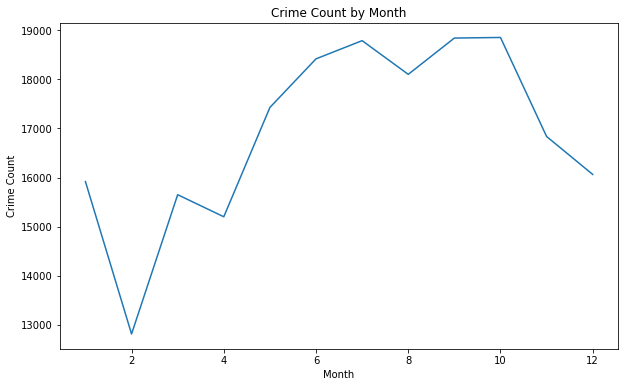

In [28]:
crime_per_month.plot(kind = 'line', figsize=(10,6))
plt.title('Crime Count by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')

## 2. Top 5 Crime by Primary Type

In [29]:
top5_crime = crime.groupby('Primary Type').ID.count().sort_values(ascending = False)[0:5]
top5_crime

Primary Type
BATTERY               40319
THEFT                 39259
CRIMINAL DAMAGE       24849
ASSAULT               20256
DECEPTIVE PRACTICE    15660
Name: ID, dtype: int64

<AxesSubplot:xlabel='Primary Type'>

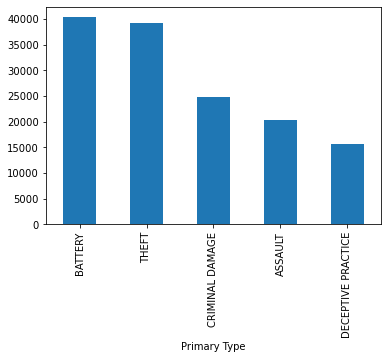

In [32]:
top5_crime.plot(kind='bar')

## 3. What is the crime rate in each community
* Crime rate is expressed by dividing the total number of reported crimes of any place by the total population, then multiplying by 100,000. This will make crime more comparable between areas with low and high population

In [16]:
#joining crime with community based on their spatial relationship (intersection)
community_count = community.sjoin(crime, how = 'left')
community_count = community_count.groupby('community').ID.count()
community_count = pd.DataFrame(community_count)
community_count = community_count.reset_index()

In [19]:
# merging crime count in each community with the community dataframe
community_count.rename(columns = {'ID': 'Crime Count'}, inplace = True)
community = community.merge(community_count, left_on = 'community', right_on = 'community')
community['Crime Rate'] = (community['Crime Count']/community['Population'])*100000
community['Crime Rate']=community['Crime Rate'].round(decimals = 3)
community.sort_values('Crime Rate', ascending = False, inplace =  True)
community[['community','Crime Rate']].head(5)

,community,Crime Rate
26,WEST GARFIELD PARK,23025.297
65,ENGLEWOOD,19561.738
2,FULLER PARK,19516.946
27,EAST GARFIELD PARK,18322.329
29,NORTH LAWNDALE,17747.313


## 4. How many arrests were made

In [24]:
arrest = crime.Arrest.value_counts()
arrest

False    178093
True      24828
Name: Arrest, dtype: int64

<AxesSubplot:ylabel='Arrest'>

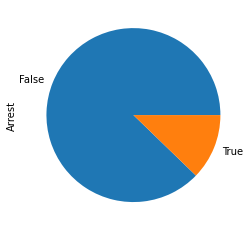

In [25]:
arrest.plot.pie()

## 5. What is the relationship between crime rate and unemployment

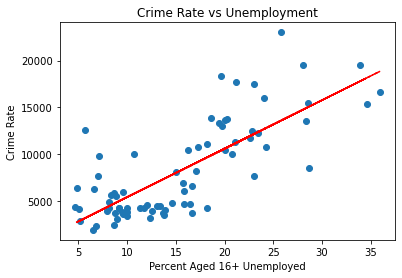

In [37]:
x = community['PERCENT AGED 16+ UNEMPLOYED']
y = community['Crime Rate']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Crime Rate vs Unemployment')
plt.xlabel('Percent Aged 16+ Unemployed')
plt.ylabel('Crime Rate')


plt.show()


In [38]:
community[['PERCENT AGED 16+ UNEMPLOYED','Crime Rate']].corr()

,PERCENT AGED 16+ UNEMPLOYED,Crime Rate
PERCENT AGED 16+ UNEMPLOYED,1.000000,0.768169
Crime Rate,0.768169,1.000000


## Conclusions
Finally, here ends the analysis of chicago crime data for the year 2021. Through this analysis, I was able to get the following insights:
* Battery had the highest count of primary type of crime at 40,319, followed by Theft and Criminal Damage. Other Narcotic Violation had the lowest count at 2.
* There is a strong positive correlation between unemployment and crime rate; that is, high unemployment rate leads to high crime rate.
* February had the lowest crime count (12810), while October had the highest crime count (18856).
* West Garfield Park had the highest crime rate amongnst the communities 

I hereby recommend that Chicago Police Department should focus on communities with high crime rates, furthermore, government should organise campaign against crime and control unemployment through incentives and fiscal policy.